In [1]:
import os
import pickle
from variational.exponential_family import GenericMeanFieldNormalDistribution, NormalDistribution, MeanFieldNormalDistribution
from experiments.logisticRegression.utils import get_tgt_log_density, get_dataset
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np

dim = 48

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))

full_gaussian = GenericMeanFieldNormalDistribution(dimension=dim)


In [2]:
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./losses/"+file, "rb")))
        lossesPKL_titles.append(str(file))

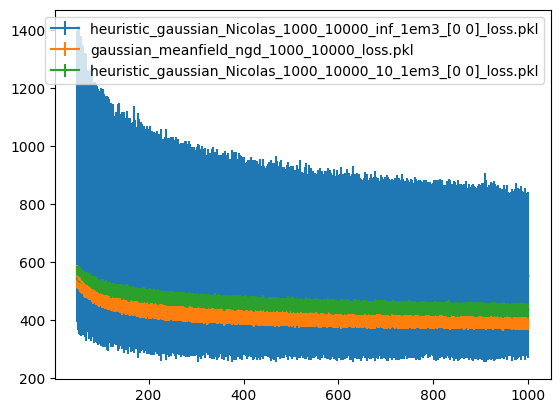

In [14]:
start=50
end=1001
for idx, pkl in enumerate(lossesPKLs):
    plt.errorbar(x=np.arange(start, end), y=pkl.mean(axis=0)[start:end], yerr=pkl.std(axis=0)[start:end], label=lossesPKL_titles[idx])
plt.legend()

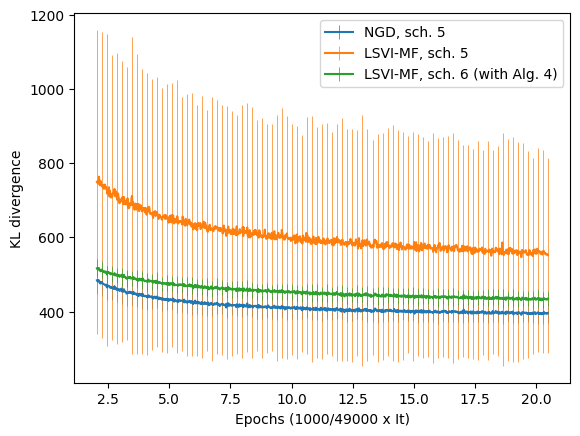

In [22]:
labels = ["LSVI-MF, sch. 5", "NGD, sch. 5", "LSVI-MF, sch. 6 (with Alg. 4)"]
start = 100
end = 1001
for idx in [1, 0, 2]:
    plt.errorbar(x=np.arange(start, end)*1000/48842,y=lossesPKLs[idx][:,start:end].mean(axis=0), 
             yerr=lossesPKLs[idx][:,start:end].std(axis=0), errorevery=10, 
                elinewidth=0.5, label=labels[idx])
#plt.xticks([50, 250, 500, 750, 1000])
plt.xlabel("Epochs (1000/49000 x It)")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig("mean_std_subsampling_mfg_starting_from_50.pdf")

In [5]:
walltime = pickle.load(open("../walltime_results.pkl", "rb"))